In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np 
import scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import librosa, librosa.display
import os
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [34]:
# loading signal and its sampling rate
x, sr = librosa.load('example_audio_005940.mp3')
ipd.Audio(x, rate=sr)

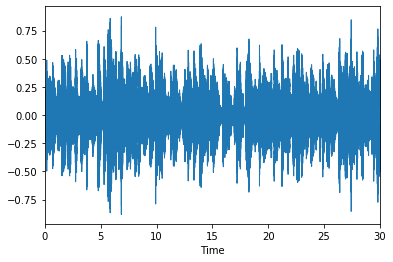

In [3]:
librosa.display.waveplot(x)

### Zero crossing rate
For a given time window, we compute the rate at which the signal crosses the horizontal axis.

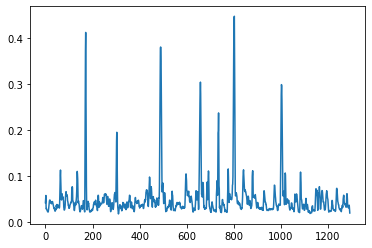

In [32]:
x_zcr = librosa.feature.zero_crossing_rate(x)[0]

# plt.figure(figsize=(12,8))
plt.plot(x_zcr)

### Spectral centroid

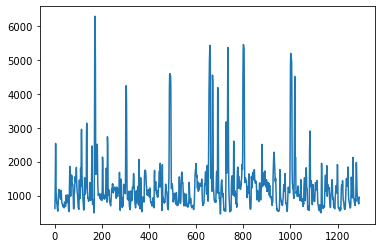

In [33]:
x_spec_cent = librosa.feature.spectral_centroid(x)[0]

# plt.figure(figsize=(12,8))
plt.plot(x_spec_cent)

### Short Time Fourier Transform



Musical signals are highly non-stationary, i.e., their statistics change over time. It would be rather meaningless to compute a single Fourier transform over an entire 10-minute song.

The short-time Fourier transform (STFT) ([Wikipedia](https://en.wikipedia.org/wiki/Short-time_Fourier_transform); FMP, p. 53) is obtained by computing the Fourier transform for successive frames in a signal.
$$ X(m, \omega) = \sum_n x(n) w(n-m) e^{-j \omega n} $$

As we increase $m$, we slide the window function $w$ to the right. For the resulting frame, $x(n) w(n-m)$, we compute the Fourier transform. Therefore, the STFT $X$ is a function of both time, $m$, and frequency, $\omega$.


In [35]:
hop_length = 512
n_fft = 2048
X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)

In [36]:
440*(2**(3/12))

523.2511306011972